# CUDA 10.2.89

In [ ]:
!wget wget http://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda_10.2.89_440.33.01_linux.run -O cuda_10.2.deb

In [ ]:
!apt-get update

In [ ]:
!apt-get install cuda-10.2

In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

In [ ]:
!nvcc --version

## Accedere a drive, compilazione ed esecuzione

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd '/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_4'

/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_4


In [ ]:
! ls

In [ ]:
! nvcc -o somma somma_mia.cu

In [ ]:
! ./somma

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!nvcc -Xptxas -v somma.cu

ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function '_Z11prodottoGPUPiS_S_i' for 'sm_52'
ptxas info    : Function properties for _Z11prodottoGPUPiS_S_i
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 10 registers, 348 bytes cmem[0]


# Esercitazione 4

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd '/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_4'

/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_4


In [ ]:
!ls

Ese1  Ese1.cu  somma  somma_mia  somma_mia.cu  Untitled0.ipynb


In [ ]:
!cat somma_mia.cu

In [ ]:
!nvcc -o somma_mia somma_mia.cu

In [ ]:
!./somma_mia

In [ ]:
!nvcc -Xptxas -v somma_mia.cu

ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function '_Z8sommaGPUPfS_S_i' for 'sm_52'
ptxas info    : Function properties for _Z8sommaGPUPfS_S_i
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 8 registers, 348 bytes cmem[0]


### Ese1

In [ ]:
!cat Ese1.cu

In [ ]:
!nvcc -Xptxas -v Ese1.cu

ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function '_Z11prodottoGPUPiS_S_i' for 'sm_52'
ptxas info    : Function properties for _Z11prodottoGPUPiS_S_i
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 10 registers, 348 bytes cmem[0]


In [4]:
!nvcc -o Ese1 Ese1.cu

In [5]:
!./Ese1

***	 PRODOTTO SCALARE DI DUE ARRAY 	***
N: 10
tempo GPU=0.000030 (s)
tempo CPU=0.000002 (s)

A_host: 1 -1 0 -2 1 -2 -1 0 2 -1 
B_host: 0 0 -2 2 1 -1 -2 -1 0 -1 

C_host: 	0 0 0 -4 1 2 2 0 0 1 
C_device(copy): 0 0 0 -4 1 2 2 0 0 1 

1. I risultati dell'host(C_host) e del device(C_device/copy) coincidono
2. Eseguo la somma totale sull'host...
   La somma totale GPU è 2
   La somma totale CPU è 2


# Esercitazione 5

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
cd '/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_5'

/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_5


In [ ]:
!ls

Ese1_vecchio.cu  Ese5  Ese5.cu	Ese5_facoltativo.cu


## Ese1

In [ ]:
!cat Ese1.cu

In [ ]:
!nvcc -Xptxas -v Ese1.cu

Ese1.cu(32): error: identifier "array" is undefined

1 error detected in the compilation of "Ese1.cu".


In [11]:
!nvcc -o Ese5 Ese5.cu

In [12]:
!./Ese5

***	 SOMMA DI DUE MATRICI: 	***
	con griglia di BxB blocchi 
	e blocchi di TxT threads 
Inserisci la dimensione della matrice (multiplo di 32), N:
5
gridDim.x: 1, gridDim.y: 1
blockDim.x: 16, blockDim.y: 16
tempo GPU=0.000020
tempo CPU=0.000002

A_host:
1	-1	0	-2	1	
-2	-1	0	2	-1	
0	0	-2	2	1	
-1	-2	-1	0	-1	
-1	1	0	2	0	
B_host:
-2	0	1	0	-2	
2	0	0	1	2	
0	1	-1	-1	0	
2	1	-1	2	2	
0	1	2	-2	-2	

C_host:
-1	-1	1	-2	-1	
0	-1	0	3	1	
0	1	-3	1	1	
1	-1	-2	2	1	
-1	2	2	0	-2	

C_device(copy):
-1	-1	1	-2	-1	
0	-1	0	3	1	
0	1	-3	1	1	
1	-1	-2	2	1	
-1	2	2	0	-2	

1. I risultati dell'host(C_host) e del device(C_device/copy) coincidono


## Ese2_opzionale

In [ ]:
!nvcc -o Ese5_facoltativo Ese5_facoltativo.cu

In [ ]:
!./Ese5_facoltativo

***	 SOMMA DI DUE MATRICI: 	***
	con griglia di B1xB2 blocchi 
	e blocchi di T1xT2 threads 
Inserisci il numero di righe (multiplo di 32), N:
1024
Inserisci il numero di colonne (multiplo di 32), M:
2048
gridDim.x: 128, gridDim.y: 256
blockDim.x: 8, blockDim.y: 8
tempo GPU=0.000113
tempo CPU=0.006802

1. I risultati dell'host(C_host) e del device(C_device/copy) coincidono


# Esercitazione 6

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
cd '/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_6'

/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_6


In [ ]:
!ls

Ese_prod_strateg1     Ese_prod_strateg2     Ese_prod_strateg3	  shared.cu
Ese_prod_strateg1.cu  Ese_prod_strateg2.cu  Ese_prod_strateg3.cu


## Ese1

In [ ]:
!nvcc -Xptxas -v shared.cu -o shared

ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function '_Z14dynamicReversePii' for 'sm_52'
ptxas info    : Function properties for _Z14dynamicReversePii
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 6 registers, 332 bytes cmem[0]
ptxas info    : Compiling entry function '_Z13staticReversePii' for 'sm_52'
ptxas info    : Function properties for _Z13staticReversePii
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 6 registers, 256 bytes smem, 332 bytes cmem[0]


### Strategia 1

In [ ]:
!cat Ese_prod_strateg1.cu

In [ ]:
!nvcc -Xptxas -v Ese_prod_strateg1.cu -o Ese_prod_strateg1

ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function '_Z11prodottoGPUPdS_S_i' for 'sm_52'
ptxas info    : Function properties for _Z11prodottoGPUPdS_S_i
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 10 registers, 348 bytes cmem[0]


In [ ]:
!nvcc -o Ese_prod_strateg1 Ese_prod_strateg1.cu

In [ ]:
!./Ese_prod_strateg1

***	 PRODOTTO SCALARE DI DUE VETTORI - 1 STRATEGIA 	***
Inserisci numero elementi dei vettori: 16000000
blockDim: 64
gridDim: 250000

tempo CPU=0.050939
tempo GPU=0.129167

prodotto_scalare_host (host): -3275.085325
prod_scalare_device (device): -3275.085325

1. I risultati dell'host e del device coincidono


### Strategia 2

In [ ]:
!nvcc -Xptxas

nvcc fatal   : argument expected after '-Xptxas'


In [ ]:
!nvcc -Xptxas -v Ese_prod_strateg2.cu -o Ese_prod_strateg2

ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function '_Z19prodottoScalareGPU2PfS_S_i' for 'sm_52'
ptxas info    : Function properties for _Z19prodottoScalareGPU2PfS_S_i
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 15 registers, 348 bytes cmem[0]


In [ ]:
!nvcc -o Ese_prod_strateg2 Ese_prod_strateg2.cu

In [ ]:
!./Ese_prod_strateg2

***	 PRODOTTO SCALARE DI DUE VETTORI - 2 STRATEGIA 	***
Inserisci numero elementi dei vettori: 16000000
blockDim: 64
gridDim: 250000

tempo CPU=0.048457
tempo GPU=0.003719

prodotto_scalare_host (host): -3274.756592
prod_scalare_device (device): -3275.094482


### Strategia 3

In [ ]:
!nvcc -Xptxas -v Ese_prod_strateg3.cu -o Ese_prod_strateg3

ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function '_Z19prodottoScalareGPU3PfS_S_i' for 'sm_52'
ptxas info    : Function properties for _Z19prodottoScalareGPU3PfS_S_i
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 9 registers, 348 bytes cmem[0]


In [7]:
!nvcc -o Ese_prod_strateg3 Ese_prod_strateg3.cu

In [8]:
!./Ese_prod_strateg3

***	 PRODOTTO SCALARE DI DUE VETTORI - 3 STRATEGIA 	***
Inserisci numero elementi dei vettori: 5
blockDim: 64
gridDim: 1

tempo CPU=0.000002
tempo GPU=0.000032

A_host: -1.209795 -0.659109 1.072918 -0.888901 0.215880 
B_host: 1.360751 -0.422468 1.132397 1.193760 1.646590 
C_device(copy): -0.858476 

prodotto_scalare_host (host): -0.858476
prod_scalare_device (device): -0.858476


# Esercitazione 7

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd '/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_7'

/content/gdrive/My Drive/MNI/Esercitazione_7


In [ ]:
!ls

Ese7  Ese7.cu  Ese7Facoltativo.cu


## Ese7

In [ ]:
!nvcc Ese7.cu -lcublas -o Ese7

In [ ]:
!./Ese7

Inserisci la dimensione M dei vettori:16000000
tempo CPU=0.048905
tempo GPU=0.000556

resultCPU: -3274.756592
resultGPU: -3275.088379


## Ese7_opzionale

In [ ]:
!nvcc Ese7Facoltativo.cu -lcublas -o Ese7Facoltativo 

In [ ]:
!./Ese7Facoltativo

Inserisci la dimensione della matrice e la dimensione del vettore: 16384
tcmalloc: large alloc 1073741824 bytes == 0x556a7023a000 @  0x7f6b1854d1e7 0x556a6f407b73 0x7f6b107bec87 0x556a6f40767a
tempo CPU=0.870479
tempo GPU=0.004821


# Esercitazione 8

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [7]:
cd '/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_8'

/content/gdrive/My Drive/MNI condiviso_finale/Esercitazione_8


In [ ]:
ls

collaborative_filtering.py  recommendation_data.py  SVD_rs.py


## Ese1

In [ ]:
dataset={
			'Lisa Rose': {'Lady in the Water': 2.5, 
							'Snakes on a Plane': 3.5,
							'Just My Luck': 3.0, 
							'Superman Returns': 3.5, 
							'You, Me and Dupree': 2.5,
							'The Night Listener': 3.0},
			'Gene Seymour': {'Lady in the Water': 3.0, 
							'Snakes on a Plane': 3.5,
							'Just My Luck': 1.5,
							 'Superman Returns': 5.0, 
							 'The Night Listener': 3.0,
							'You, Me and Dupree': 3.5},

			'Michael Phillips': {'Lady in the Water': 2.5, 
								'Snakes on a Plane': 3.0,
								'Superman Returns': 3.5,
								 'The Night Listener': 4.0},
			'Claudia Puig': {'Snakes on a Plane': 3.5, 
							'Just My Luck': 3.0,
							'The Night Listener': 4.5, 
							'Superman Returns': 4.0,
							'You, Me and Dupree': 2.5},
			'Mick LaSalle': {'Lady in the Water': 3.0, 
							'Snakes on a Plane': 4.0,
							'Just My Luck': 2.0, 
							'Superman Returns': 3.0, 
							'The Night Listener': 3.0,
							'You, Me and Dupree': 2.0},
			'Jack Matthews': {'Lady in the Water': 3.0, 
							'Snakes on a Plane': 4.0,
							'The Night Listener': 3.0, 
							'Superman Returns': 5.0, 
							'You, Me and Dupree': 3.5},
			'Toby': {'Snakes on a Plane':4.5,
					'You, Me and Dupree':1.0,
					'Superman Returns':4.0}}


#!/usr/bin/env python
# Implementation of collaborative filtering recommendation engine


from recommendation_data import dataset
from math import sqrt

def similarity_score(person1,person2):
	
	# Returns ratio Euclidean distance score of person1 and person2 

	both_viewed = {}		# To get both rated items by person1 and person2

	for item in dataset[person1]:
		if item in dataset[person2]:
			both_viewed[item] = 1

		# Conditions to check they both have an common rating items	
		if len(both_viewed) == 0:
			return 0

		# Finding Euclidean distance 
		sum_of_eclidean_distance = []	

		for item in dataset[person1]:
			if item in dataset[person2]:
				sum_of_eclidean_distance.append(pow(dataset[person1][item] - dataset[person2][item],2))
		sum_of_eclidean_distance = sum(sum_of_eclidean_distance)

		return 1/(1+sqrt(sum_of_eclidean_distance))

def pearson_correlation(person1,person2):

	# To get both rated items
	both_rated = {}
	for item in dataset[person1]:
		if item in dataset[person2]:
			both_rated[item] = 1

	number_of_ratings = len(both_rated)		
	
	# Checking for number of ratings in common
	if number_of_ratings == 0:
		return 0

	# Add up all the preferences of each user
	person1_preferences_sum = sum([dataset[person1][item] for item in both_rated])
	person2_preferences_sum = sum([dataset[person2][item] for item in both_rated])

	# Sum up the squares of preferences of each user
	person1_square_preferences_sum = sum([pow(dataset[person1][item],2) for item in both_rated])
	person2_square_preferences_sum = sum([pow(dataset[person2][item],2) for item in both_rated])

	# Sum up the product value of both preferences for each item
	product_sum_of_both_users = sum([dataset[person1][item] * dataset[person2][item] for item in both_rated])

	# Calculate the pearson score
	numerator_value = product_sum_of_both_users - (person1_preferences_sum*person2_preferences_sum/number_of_ratings)
	denominator_value = sqrt((person1_square_preferences_sum - pow(person1_preferences_sum,2)/number_of_ratings) * (person2_square_preferences_sum -pow(person2_preferences_sum,2)/number_of_ratings))
	if denominator_value == 0:
		return 0
	else:
		r = numerator_value/denominator_value
		return r 

def most_similar_users(person,number_of_users):
	# returns the number_of_users (similar persons) for a given specific person.
	scores = [(pearson_correlation(person,other_person),other_person) for other_person in dataset if  other_person != person ]
	
	# Sort the similar persons so that highest scores person will appear at the first
	scores.sort()
	scores.reverse()
	return scores[0:number_of_users]

def user_recommendations(my_person, choice: str):

	# Gets recommendations for a person by using a weighted average of every other user's rankings
	totals = {}
	simSums = {}
	rankings_list = []

	for other in dataset:
		# don't compare me to myself
		if other == my_person:
			continue

		# scelta della funzione di similarity
		if choice == "pearson":
			sim = pearson_correlation(my_person, other)
		elif choice == "euclidea":
			sim = similarity_score(my_person, other)

		# ignore scores of zero or lower
		if sim <= 0:		# scartiamo l'utente 'other'
			continue

		for film in dataset[other]:

			# only score movies i haven't seen yet
			if film not in dataset[my_person] or dataset[my_person][film] == 0:

				# Similarity * score
				totals.setdefault(film,0)
				totals[film] += dataset[other][film]* sim

				# sum of similarities
				simSums.setdefault(film,0)
				simSums[film] += sim

		# STAMPA DELLE INFORMAZIONI
		print(f"\n{other}, SIMILARITY: {round(sim,2)}")
		for film in dataset[other]:		#calcoliamo la similarità solo per i film non visti da Toby
			if film not in dataset[my_person]:
				print(f"Film: {film} "
					  f"- Voto: {round(dataset[other][film],2)} "
					  f"- Film_Similarity: {round(dataset[other][film] * sim, 2)}")	#in questa riga vi è il prodotto tra l'indice di similarità ed il film

	# Create the normalized list
	rankings = [(total/simSums[item],item) for item,total in totals.items()]
	rankings.sort()
	rankings.reverse()

	print("\nRankings")
	for rank in rankings:
		print(f"{rank}")

	# returns the recommended items
	recommendataions_list = [recommend_item for score,recommend_item in rankings]
	return recommendataions_list
		
def calculateSimilarItems(prefs,n=10):
	# Create a dictionary of items showing which other items they
	# are most similar to.
	result={}
	# Invert the preference matrix to be item-centric
	itemPrefs=transformPrefs(prefs)
	c=0
	for item in itemPrefs:
		# Status updates for large datasets
		c+=1
		if c%100==0: print("%d / %d" % (c,len(itemPrefs)))
		# Find the most similar items to this one
		scores=topMatches(itemPrefs,item,n=n,similarity=sim_distance)
		result[item]=scores
	return result

def recommendations_approximation(user, product):

	# Stimiamo la valutazione di 'user' per 'product'
	average_vote_user = 0.0
	sum_sims = 0.0
	sum_sims_weighted = 0.0

	# Calcolo la media delle valutazioni di 'user'
	for film in dataset[user]:
		average_vote_user += dataset[user][film]
	average_vote_user /= len(dataset[user])

	# Per ogni altro utente diverso e che ha valutato 'product'
	for other_user in dataset:
		average_local = 0.0

		if other_user == user:
			continue

		if product in dataset[other_user]:
			# ne calcolo la similarità secondo la formula di Pearson (come richiesto dalla traccia)
			sim = pearson_correlation(user, other_user)

			# calcolo il voto medio di tutti i film che ha vist 'other_user'
			for other_item in dataset[other_user]:
				average_local += dataset[other_user][other_item]
			average_local /= len(dataset[other_user])

			# aggiorno le somme delle simillarità
			voto_film_other_user = dataset[other_user][product]
			sum_sims_weighted += sim * (voto_film_other_user - average_local)
			sum_sims += sim

	approx_vote = average_vote_user + (sum_sims_weighted / sum_sims)

	return {product: approx_vote}

if __name__ == "__main__" :
	print("\n\033[1m Misura di Similarità: Correlazione di Pearson \033[0m")
	print(f"\nFilm consigliati per Toby: {user_recommendations('Toby','pearson')}")
	print("\n---------------------------------------")

	print("\n\033[1m Misura di Similarità: Distanza Euclidea \033[0m")
	print(f"\nFilm consigliati per Toby: {user_recommendations('Toby','euclidea')}")
	print("\n---------------------------------------")

	print("\n\033[1m Stime di Valutazioni: \033[0m")
	for item in ['The Night Listener', 'Lady in the Water', 'Just My Luck']: #vogliamo vedere quanto sono raccomandabili questi film a Toby
		print(f"{recommendations_approximation('Toby', item)}")

	print("Il film più raccomandato è 'Lady in the Water' e a seguire abbiamo 'The Night Listener' e 'Just My Luck'")

	print("\n---------------------------------------")


 Misura di Similarità: Correlazione di Pearson 

Lisa Rose, SIMILARITY: 0.99
Film: Lady in the Water - Voto: 2.5 - Film_Similarity: 2.48
Film: Just My Luck - Voto: 3.0 - Film_Similarity: 2.97
Film: The Night Listener - Voto: 3.0 - Film_Similarity: 2.97

Gene Seymour, SIMILARITY: 0.38
Film: Lady in the Water - Voto: 3.0 - Film_Similarity: 1.14
Film: Just My Luck - Voto: 1.5 - Film_Similarity: 0.57
Film: The Night Listener - Voto: 3.0 - Film_Similarity: 1.14

Claudia Puig, SIMILARITY: 0.89
Film: Just My Luck - Voto: 3.0 - Film_Similarity: 2.68
Film: The Night Listener - Voto: 4.5 - Film_Similarity: 4.02

Mick LaSalle, SIMILARITY: 0.92
Film: Lady in the Water - Voto: 3.0 - Film_Similarity: 2.77
Film: Just My Luck - Voto: 2.0 - Film_Similarity: 1.85
Film: The Night Listener - Voto: 3.0 - Film_Similarity: 2.77

Jack Matthews, SIMILARITY: 0.66
Film: Lady in the Water - Voto: 3.0 - Film_Similarity: 1.99
Film: The Night Listener - Voto: 3.0 - Film_Similarity: 1.99

Rankings
(3.347789526713101

## Ese2

Dimensions of U, s and V
U.shape: (6, 6)
[[-0.45 -0.54 -0.01 -0.5  -0.39 -0.33]
 [-0.36  0.25  0.86 -0.15  0.08  0.2 ]
 [-0.29 -0.4  -0.23 -0.1   0.44  0.71]
 [-0.21  0.67 -0.4  -0.59  0.03  0.07]
 [-0.51  0.06 -0.11  0.29  0.59 -0.54]
 [-0.53  0.19 -0.19  0.53 -0.55  0.24]]
S.shape: (4,)
[17.71  6.39  3.1   1.33]
V.shape: (4, 4)
[[-0.57 -0.43 -0.38 -0.59]
 [-0.22 -0.52  0.82  0.05]
 [ 0.67 -0.69 -0.25  0.01]
 [ 0.41  0.26  0.33 -0.81]]

Vector of singular values =  [17.71392084  6.39167145  3.09796097  1.32897797]

SVD troncata con k=2. Stampa di U, s e V con 2 cifre decimali
U_k = [[-0.45 -0.54]
 [-0.36  0.25]
 [-0.29 -0.4 ]
 [-0.21  0.67]
 [-0.51  0.06]
 [-0.53  0.19]]

S_k = [[17.71  0.  ]
 [ 0.    6.39]]

V_k = [[-0.57 -0.22]
 [-0.43 -0.52]
 [-0.38  0.82]
 [-0.59  0.05]]

Valutazioni delle stagioni di Luke: [5 5 0 0 0 5]

Valutazioni di Luke proiettate nello spazio 2D: [-0.37752201 -0.08020351]

coseno dell'angolo tra Luke e Ryne: 0.99
coseno dell'angolo tra Luke e Erin: 0.78
cose

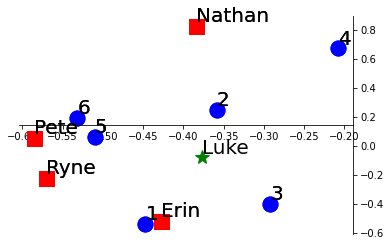

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla

# ## Problema
# 4 utenti e loro valutazioni per 6 stagioni
# 
# |        | Ryne | Erin | Nathan | Pete |
# | --- | --- | --- | --- | --- |
# | season 1 | 5 | 5 | 0 | 5 |
# | season 2 | 5 | 0 | 3 | 4 |
# | season 3 | 3 | 4 | 0 | 3 |
# | season 4 | 0 | 0 | 5 | 3 |
# | season 5 | 5 | 4 | 4 | 5 |
# | season 6 | 5 | 4 | 5 | 5 |


seasons = [1, 2, 3, 4, 5, 6]
users = ['Ryne', 'Erin', 'Nathan', 'Pete']
k = 2

A = np.array([
    [5, 5, 0, 5],  # season 1
    [5, 0, 3, 4],  # season 2
    [3, 4, 0, 3],  # season 3
    [0, 0, 5, 3],  # season 4
    [5, 4, 4, 5],  # season 5
    [5, 4, 5, 5]   # season 6
], dtype=float)

# ## Calcoliamo la SVD di A
print('Dimensions of U, s and V')
U, S, V = sla.svd(A)
print("\033[1mU.shape: \033[0m" + str(U.shape))
print(str(U.round(2)))
print("\033[1mS.shape: \033[0m" + str(S.shape))
print(str(S.round(2)))
print("\033[1mV.shape: \033[0m" + str(V.shape))
print(str(V.round(2)))
print('\nVector of singular values = ', S)

# ### rappresentiamo i dati in uno spazio a k dimensioni
U2 = U[:, :k]       #1 matrice
V2 = V.T[:, :k]     #2 matrice
S2 = np.diag(S[:k]) #3 matrice
print(f'\nSVD troncata con k={k}. Stampa di U, s e V con 2 cifre decimali')
print('U_k =', U2.round(2))
print('\nS_k =', S2.round(2))
print('\nV_k =', V2.round(2))

# ### Grafichiamo la proiezione dei dati in uno spazio 2D
#
# Le prime due colonne di U rappresentano le stagioni. Le prime due righe di V rappresentano gli utenti.
#
#  x rappresenti la prima componente, y la seconda
plt.plot(U2[:, 0], U2[:, 1], 'bo', markersize=15, clip_on=False, label='seasons')
plt.plot(V2[:, 0], V2[:, 1], 'rs', markersize=15, clip_on=False, label='users')

ax = plt.gca()
for i, txt in enumerate(seasons):
    ax.text(U2[i, 0], U2[i, 1], txt, ha='left', va='bottom', fontsize=20)

for i, txt in enumerate(users):
    ax.text(V2[i, 0], V2[i, 1], txt, ha='left', va='bottom', fontsize=20)

# axis trickery
ax = plt.gca()
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left']
ax.spines['bottom']
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# ## Obiettivo: trovare utenti simili per fornire raccomandazioni
#
# Aggiungiamo l'utente Luke, che dà le valutazioni seguenti per le stagioni:
# 5,5,0,0,0,5.
# Per fornire raccomandazioni a Luke troviamo gli utenti più simili a Luke,
# rappresentando Luke nello spazio 2D in cui abbiamo rappresentato gli utenti
luke = np.array([5, 5, 0, 0, 0, 5])
print('\nValutazioni delle stagioni di Luke:', luke)

#
# Per proiettare le valutazioni di Luke nello spazio 2D degli utenti, se esse sono indicate con L
#
# L^T * U_2 * S_2^{-1}
#
luke2d = luke.dot(U2.dot(np.linalg.inv(S2)))
print(f'\nValutazioni di Luke proiettate nello spazio 2D: {luke2d}\n')

# Grafichiamo le valutazioni di Luke così rappresentate
plt.plot(U2[:, 0], U2[:, 1], 'bo', markersize=15, clip_on=False, label='seasons')
plt.plot(V2[:, 0], V2[:, 1], 'rs', markersize=15, clip_on=False, label='users')

ax = plt.gca()
for i, txt in enumerate(seasons):
    ax.text(U2[i, 0], U2[i, 1], txt, ha='left', va='bottom', fontsize=20)

for i, txt in enumerate(users):
    ax.text(V2[i, 0], V2[i, 1], txt, ha='left', va='bottom', fontsize=20)

plt.plot(luke2d[0], luke2d[1], 'g*', markersize=15, clip_on=False, label='luke')
ax.text(luke2d[0], luke2d[1], 'Luke', ha='left', va='bottom', fontsize=20)

# axis trickery
ax = plt.gca()
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left']
ax.spines['bottom']
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Osserviamo che gli angoli minori sono tra Luke e Pete e tra Luke e Ryne
#
# per quantificare la distanza usiamo la similarità coseno
# $$
# similarity (a,b) = (a,b)/(||a|| ||b||)
# $$
similar_users = []
for i, xy in enumerate(V2):
    angle = np.dot(xy, luke2d) / (np.linalg.norm(xy) * np.linalg.norm(luke2d))
    similar_users.append((users[i], round(angle, 2)))
    print("coseno dell'angolo tra %s e %s: %2.2g" % ('Luke', users[i], angle))

similar_users.sort(reverse=True)
print(f"\nQuindi, gli utenti più simili a Luke (ordine decrescente) sono: {similar_users}")

plt.show()
# plt.show(block=False) # così non si blocca l'esecuzione dopo il plot